In [ ]:
import os # 파일폴더 경로등의 정보를 가져오기 위함
import re # Regular Expression을 의미함
import pandas as pd # 데이터 구조화
import tensorflow as tf # 텐서플로우를 종국적으로 쓸 예정
from tensorflow.keras import utils # 인터넷을 통해 외부에서 자료 다운

data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz', # download file name
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True,
)

In [ ]:
def directory_data(directory):
    data={}
    data['review'] = []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r', encoding='utf-8') as file:
            data['review'].append(file.read())
    #print(data['review'][1:2])
    return pd.DataFrame.from_dict(data)

In [ ]:
def data(directory):
    pos_df = directory_data(os.path.join(directory, 'pos'))
    neg_df = directory_data(os.path.join(directory, 'neg'))
    pos_df['sentiment'] = 1
    neg_df['sentiment'] = 0
    return pd.concat([pos_df, neg_df])

In [ ]:
train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", 'train'))
test_df = data(os.path.join(os.path.dirname(data_set), 'aclImdb', 'test'))
train_df.head()

,review,sentiment
0,dear god where do i begin. this is bar none th...,1
1,One piece of trivia that is often forgotten ab...,1
2,IN LOVING MEMORY OF DAVID TOMLINSON (1917-2000...,1
3,"Jodie Foster, Cherie Currie (the former lead s...",1
4,"An unassuming, subtle and lean film, ""The Man ...",1


In [ ]:
train_df.shape, test_df.shape

((25000, 2), (25000, 2))

In [ ]:
train_df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
test_df['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [ ]:
reviews = list(train_df['review'])
tokenized_reviews = [r.split() for r in reviews]
review_len_by_words = [len(t) for t in tokenized_reviews]
review_len_by_alphabet = [len(s.replace(' ', '')) for s in reviews]

Text(0, 0.5, 'Number of Reviews')

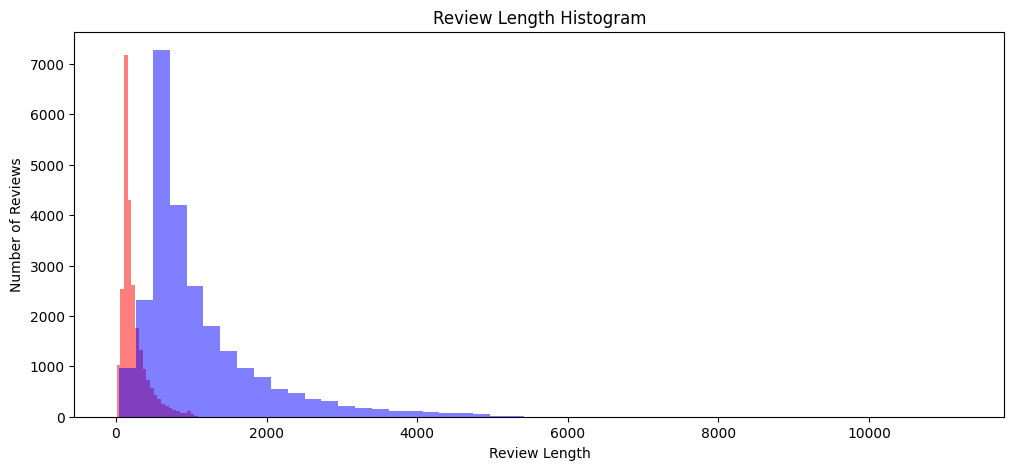

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(review_len_by_words, bins=50, alpha=0.5, color='r')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

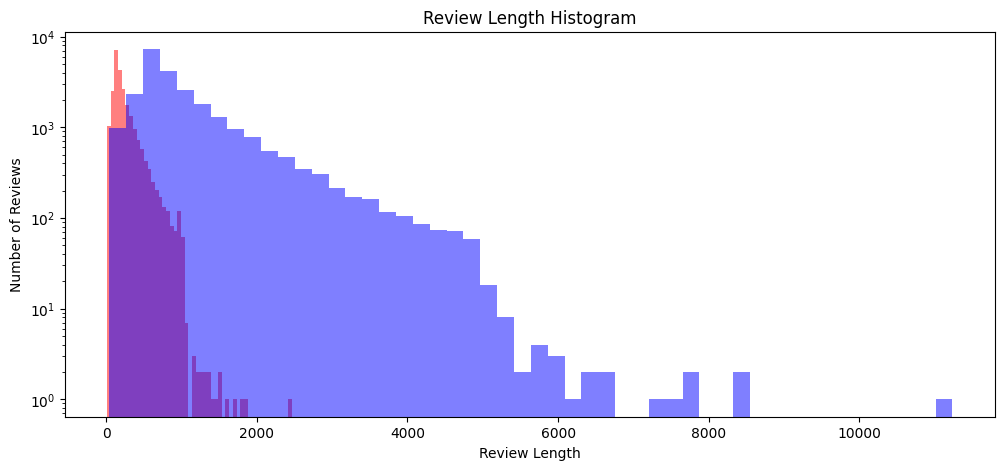

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.hist(review_len_by_words, bins=50, alpha=0.5, color='r')
plt.hist(review_len_by_alphabet, bins=50, alpha=0.5, color='b')
plt.yscale('log', nonpositive='clip')
plt.title('Review Length Histogram')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')

In [ ]:
import numpy as np
print('단어의 최대 갯수:', np.max(review_len_by_words))
print('단어의 최소 갯수:', np.min(review_len_by_words))
print('단어의 평균 갯수:', np.mean(review_len_by_words))
print('단어 갯수 표준편차:', np.std(review_len_by_words))
print('단어 갯수의 중간 값:', np.median(review_len_by_words))
print('단어 개수의 하위 10%:', np.percentile(review_len_by_words, 10))

단어의 최대 갯수: 2470
단어의 최소 갯수: 10
단어의 평균 갯수: 233.7872
단어 갯수 표준편차: 173.72955740506563
단어 갯수의 중간 값: 174.0
단어 개수의 하위 10%: 91.0
